In [1281]:
# importing neccessery libriries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1282]:
df = pd.read_csv('red_wine_ml.csv')
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low,red wine
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low,red wine
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low,red wine
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium,red wine
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low,red wine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,low,red wine
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium,red wine
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium,red wine
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,low,red wine


In [1283]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_label', 'wine_type'],
      dtype='object')

In [1284]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_label           0
wine_type               0
dtype: int64

In [1285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  quality_label         1599 non-null   object 
 13  wine_type             1599 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 175.0+ KB


In [1286]:
df.duplicated().sum()

np.int64(240)

In [1287]:
string_col = df.select_dtypes(include="object").columns
df[string_col].head()

,quality_label,wine_type
0,low,red wine
1,low,red wine
2,low,red wine
3,medium,red wine
4,low,red wine


In [1288]:
for col in string_col:
    print(f"The distribution of categorical values in the {col} is : ")
    print(df[col].value_counts())

The distribution of categorical values in the quality_label is : 
quality_label
medium    837
low       744
high       18
Name: count, dtype: int64
The distribution of categorical values in the wine_type is : 
wine_type
red wine    1599
Name: count, dtype: int64


# Outliers

In [1289]:
dfm = df.copy()

In [1290]:
# q1 = dfm.fixed_acidity.quantile([0.25])
# q3 = dfm.fixed_acidity.quantile([0.75])
# print(q1)
# print(q3)

q1fa = np.percentile(dfm.fixed_acidity, 25)
q3fa = np.percentile(dfm.fixed_acidity, 75)
print(q1fa)
print(q3fa)
iqrfa = q3fa - q1fa
print(iqrfa)
lower_treshold_fa = q1fa - (1.5*iqrfa)
print(lower_treshold_fa)
higher_treshold_fa = q3fa + (1.5*iqrfa)
print(higher_treshold_fa)
print('----------')
# q1 = dfm.fixed_acidity.quantile([0.25])
# q3 = dfm.fixed_acidity.quantile([0.75])
# print(q1)
# print(q3)

q1cl = np.percentile(dfm.chlorides, 25)
q3cl = np.percentile(dfm.chlorides, 75)
print(q1cl)
print(q3cl)
iqrcl = q3cl - q1cl
print(iqrcl)
lower_treshold_cl = q1cl - (1.5*iqrcl)
print(lower_treshold_cl)
higher_treshold_cl = q3cl + (1.5*iqrcl)
print(higher_treshold_cl)
print('----------')
# q1 = dfm.fixed_acidity.quantile([0.25])
# q3 = dfm.fixed_acidity.quantile([0.75])
# print(q1)
# print(q3)

q1su = np.percentile(dfm.sulphates, 25)
q3su = np.percentile(dfm.sulphates, 75)
print(q1su)
print(q3su)
iqrsu = q3su - q1su
print(iqrsu)
lower_treshold_su = q1su - (1.5*iqrsu)
print(lower_treshold_su)
higher_treshold_su = q3su + (1.5*iqrsu)
print(higher_treshold_su)


7.1
9.2
2.0999999999999996
3.95
12.349999999999998
----------
0.07
0.09
0.01999999999999999
0.04000000000000002
0.11999999999999998
----------
0.55
0.73
0.17999999999999994
0.28000000000000014
0.9999999999999999


# No Outliers

In [1291]:
# dfm_clean = dfm[
#     (dfm['fixed_acidity'] >= lower_treshold_fa) & (dfm['fixed_acidity'] <= higher_treshold_fa) &
#     (df['chlorides'] >= lower_treshold_cl) & (df['chlorides'] <= higher_treshold_cl) &
#     (df['sulphates'] >= lower_treshold_su) & (df['sulphates'] <= higher_treshold_su)
# ]
# dfm_clean.head()

dfm_clean = dfm[
    (dfm['fixed_acidity'] >= lower_treshold_fa) & (dfm['fixed_acidity'] <= higher_treshold_fa)
]
dfm_clean = dfm[
    (df['chlorides'] >= lower_treshold_cl) & (df['chlorides'] <= higher_treshold_cl)
]
dfm_clean = dfm[
    (df['sulphates'] >= lower_treshold_su) & (df['sulphates'] <= higher_treshold_su)
]

dfm_clean.head(20)
dfm.info()
print('---')
dfm_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  quality_label         1599 non-null   object 
 13  wine_type             1599 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 175.0+ KB
---
<class '

# Machine Starts

In [1292]:
dfm_clean['quality_label'].replace({'low':0, 'medium':1, 'high':2}, inplace=True)
# I actually should drop wine type as we do not need it. 
# dfm.drop('quality_label', axis=1)
dfm_clean['wine_type'].replace({'white wine':0, 'red wine':1}, inplace=True)

/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_84872/788181162.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfm_clean['quality_label'].replace({'low':0, 'medium':1, 'high':2}, inplace=True)
/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_84872/788181162.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('futu

In [1293]:
dfm_clean.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_label', 'wine_type'],
      dtype='object')

In [1294]:
from sklearn.model_selection import train_test_split, GridSearchCV

# split data into X and Y
X = dfm_clean.drop(['quality_label', 'quality', 'density', 'chlorides', 'wine_type', 'free_sulfur_dioxide', 'pH', 'sulphates', 'free_sulfur_dioxide'], axis=1)
y = dfm_clean['quality_label']

# split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [1295]:
y_test.shape

(308,)

In [1296]:
x_test.shape

(308, 6)

# Build Models

# Logistic Regression

In [1297]:
from sklearn.linear_model import LogisticRegression

# LogisticRegression model
LR_model = LogisticRegression(random_state=42, max_iter=100)
# fit model
LR_model.fit(x_train, y_train)
# predictions
preds_LR = LR_model.predict(x_test)
from sklearn.metrics import mean_squared_error, accuracy_score # rmse root mean square error

acc_LR = accuracy_score(y_test, preds_LR)
print(acc_LR)

0.672077922077922


/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# LR Evaluation

In [1298]:
print(type(y_test))
print(type(preds_LR))

print(set(y_test))
print(set(preds_LR))


<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
{0, 1, 2}
{np.int64(0), np.int64(1)}


In [1299]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds_LR))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds_LR)

              precision    recall  f1-score   support

           0       0.67      0.65      0.66       141
           1       0.68      0.71      0.69       161
           2       0.00      0.00      0.00         6

    accuracy                           0.67       308
   macro avg       0.45      0.46      0.45       308
weighted avg       0.66      0.67      0.67       308



/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

array([[ 92,  49,   0],
       [ 46, 115,   0],
       [  0,   6,   0]])

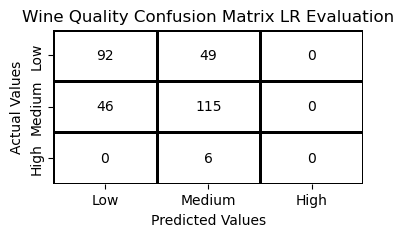

In [1311]:
cm = confusion_matrix(y_test, preds_LR)
cm_df = pd.DataFrame(cm,
                     index = ["Low","Medium","High"],
                     columns = ["Low","Medium","High"])
plt.figure(figsize=(4,2))

# Create a custom color map where all values are white
cmap = sns.color_palette(["#FFFFFF"])

sns.heatmap(cm_df, annot=True, fmt='d', cmap=cmap, cbar=False, linewidths=.8, linecolor='black', annot_kws={"color": "black"})
plt.title('Wine Quality Confusion Matrix LR Evaluation')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DTC_model = DecisionTreeClassifier(random_state=42)

# fit model
DTC_model.fit(x_train, y_train)

# predictions
predsDTC = DTC_model.predict(x_test)

from sklearn.metrics import mean_squared_error, accuracy_score # rmse root mean square error

acc_DTC = accuracy_score(y_test, predsDTC)
print(acc_DTC)

0.7045454545454546


# DTC Evaluation

In [1308]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predsDTC))


print('-----------')
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predsDTC)



              precision    recall  f1-score   support

           0       0.69      0.72      0.70       141
           1       0.73      0.71      0.72       161
           2       0.50      0.33      0.40         6

    accuracy                           0.70       308
   macro avg       0.64      0.59      0.61       308
weighted avg       0.70      0.70      0.70       308

-----------


array([[101,  40,   0],
       [ 45, 114,   2],
       [  1,   3,   2]])

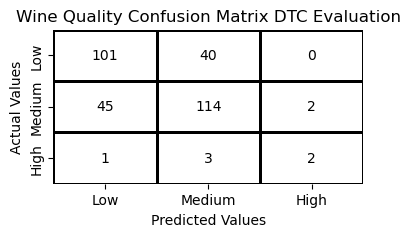

In [1310]:
cm = confusion_matrix(y_test, predsDTC)
cm_df = pd.DataFrame(cm,
                     index = ["Low","Medium","High"],
                     columns = ["Low","Medium","High"])
plt.figure(figsize=(4,2))

# Create a custom color map where all values are white
cmap = sns.color_palette(["#FFFFFF"])

sns.heatmap(cm_df, annot=True, fmt='d', cmap=cmap, cbar=False, linewidths=.8, linecolor='black', annot_kws={"color": "black"})
plt.title('Wine Quality Confusion Matrix DTC Evaluation')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# GaussianNB

In [ ]:

from sklearn.naive_bayes import GaussianNB

GNB_model = GaussianNB()

# fit model
GNB_model.fit(x_train, y_train)

# predictions
predsGNB = GNB_model.predict(x_test)

from sklearn.metrics import mean_squared_error, accuracy_score 

acc_GNB = accuracy_score(y_test, predsGNB)
print(acc_GNB)

0.6558441558441559


# GNB Evaluation

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predsGNB))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predsGNB)

              precision    recall  f1-score   support

           0       0.64      0.68      0.66       141
           1       0.68      0.66      0.67       161
           2       0.00      0.00      0.00         6

    accuracy                           0.66       308
   macro avg       0.44      0.45      0.44       308
weighted avg       0.64      0.66      0.65       308



/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

array([[ 96,  45,   0],
       [ 55, 106,   0],
       [  0,   6,   0]])

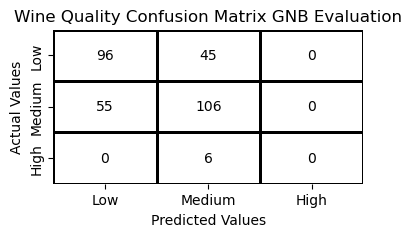

In [1312]:
cm = confusion_matrix(y_test, predsGNB)
cm_df = pd.DataFrame(cm,
                     index = ["Low","Medium","High"],
                     columns = ["Low","Medium","High"])
plt.figure(figsize=(4,2))

# Create a custom color map where all values are white
cmap = sns.color_palette(["#FFFFFF"])

sns.heatmap(cm_df, annot=True, fmt='d', cmap=cmap, cbar=False, linewidths=.8, linecolor='black', annot_kws={"color": "black"})
plt.title('Wine Quality Confusion Matrix GNB Evaluation')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest Classifier model
RF_clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=101)
# fit model
RF_clf.fit(x_train, y_train)
# predictions
predsRF = RF_clf.predict(x_test)
# accuracy
acc_RF = accuracy_score(y_test, predsRF)
print(acc_RF)

0.7662337662337663


# RF Evaluation

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predsRF))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predsRF)

              precision    recall  f1-score   support

           0       0.77      0.74      0.76       141
           1       0.76      0.81      0.78       161
           2       1.00      0.17      0.29         6

    accuracy                           0.77       308
   macro avg       0.84      0.57      0.61       308
weighted avg       0.77      0.77      0.76       308



array([[105,  36,   0],
       [ 31, 130,   0],
       [  0,   5,   1]])

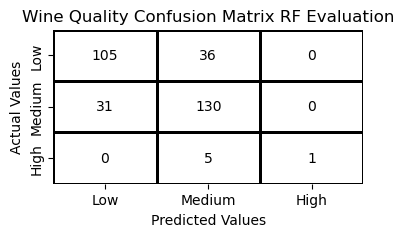

In [1313]:
cm = confusion_matrix(y_test, predsRF)
cm_df = pd.DataFrame(cm,
                     index = ["Low","Medium","High"],
                     columns = ["Low","Medium","High"])
plt.figure(figsize=(4,2))

# Create a custom color map where all values are white
cmap = sns.color_palette(["#FFFFFF"])

sns.heatmap(cm_df, annot=True, fmt='d', cmap=cmap, cbar=False, linewidths=.8, linecolor='black', annot_kws={"color": "black"})
plt.title('Wine Quality Confusion Matrix RF Evaluation')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# SVC Model

In [ ]:
from sklearn.svm import SVC

SVC_model = SVC(random_state=42)

# fit model
SVC_model.fit(x_train, y_train)

# predictions
predsSVC = SVC_model.predict(x_test)

from sklearn.metrics import mean_squared_error, accuracy_score # rmse root mean square error

acc_SVC = accuracy_score(y_test, predsSVC)
print(acc_SVC)

0.6233766233766234


# SVC Evaluation

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predsSVC))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predsSVC)

              precision    recall  f1-score   support

           0       0.72      0.34      0.46       141
           1       0.60      0.89      0.72       161
           2       0.00      0.00      0.00         6

    accuracy                           0.62       308
   macro avg       0.44      0.41      0.39       308
weighted avg       0.64      0.62      0.59       308



/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

array([[ 48,  93,   0],
       [ 17, 144,   0],
       [  2,   4,   0]])

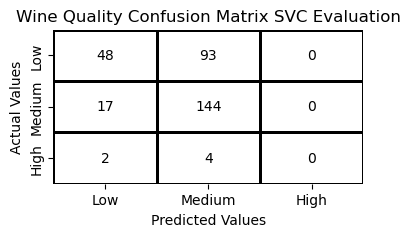

In [1314]:
cm = confusion_matrix(y_test, predsSVC)
cm_df = pd.DataFrame(cm,
                     index = ["Low","Medium","High"],
                     columns = ["Low","Medium","High"])
plt.figure(figsize=(4,2))

# Create a custom color map where all values are white
cmap = sns.color_palette(["#FFFFFF"])

sns.heatmap(cm_df, annot=True, fmt='d', cmap=cmap, cbar=False, linewidths=.8, linecolor='black', annot_kws={"color": "black"})
plt.title('Wine Quality Confusion Matrix SVC Evaluation')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNC_model = KNeighborsClassifier(n_neighbors=5)

# fit model
KNC_model.fit(x_train, y_train)

# predictions
predsKNC = KNC_model.predict(x_test)

from sklearn.metrics import mean_squared_error, accuracy_score # rmse root mean square error

acc_KNC = accuracy_score(y_test, predsKNC)
print(acc_KNC)


0.6233766233766234


# KNC Evaluation

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predsKNC))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predsKNC)

              precision    recall  f1-score   support

           0       0.61      0.63      0.62       141
           1       0.64      0.64      0.64       161
           2       0.00      0.00      0.00         6

    accuracy                           0.62       308
   macro avg       0.42      0.42      0.42       308
weighted avg       0.61      0.62      0.62       308



/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

array([[ 89,  52,   0],
       [ 58, 103,   0],
       [  0,   6,   0]])

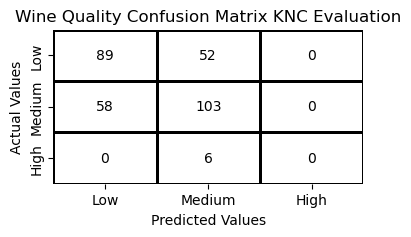

In [1315]:
cm = confusion_matrix(y_test, predsKNC)
cm_df = pd.DataFrame(cm,
                     index = ["Low","Medium","High"],
                     columns = ["Low","Medium","High"])
plt.figure(figsize=(4,2))

# Create a custom color map where all values are white
cmap = sns.color_palette(["#FFFFFF"])

sns.heatmap(cm_df, annot=True, fmt='d', cmap=cmap, cbar=False, linewidths=.8, linecolor='black', annot_kws={"color": "black"})
plt.title('Wine Quality Confusion Matrix KNC Evaluation')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ABC_model = AdaBoostClassifier(n_estimators=50)

# fit model
ABC_model.fit(x_train, y_train)

# predictions
predsABC = ABC_model.predict(x_test)

from sklearn.metrics import mean_squared_error, accuracy_score # rmse root mean square error

acc_ABC = accuracy_score(y_test, predsABC)
print(acc_ABC)


0.6590909090909091


# ADBC Evaluation

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predsABC))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predsABC)

              precision    recall  f1-score   support

           0       0.65      0.67      0.66       141
           1       0.68      0.67      0.67       161
           2       0.00      0.00      0.00         6

    accuracy                           0.66       308
   macro avg       0.44      0.45      0.44       308
weighted avg       0.65      0.66      0.65       308



array([[ 95,  46,   0],
       [ 52, 108,   1],
       [  0,   6,   0]])

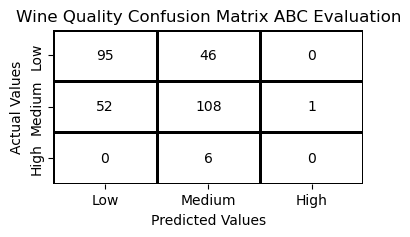

In [1316]:
cm = confusion_matrix(y_test, predsABC)
cm_df = pd.DataFrame(cm,
                     index = ["Low","Medium","High"],
                     columns = ["Low","Medium","High"])
plt.figure(figsize=(4,2))

# Create a custom color map where all values are white
cmap = sns.color_palette(["#FFFFFF"])

sns.heatmap(cm_df, annot=True, fmt='d', cmap=cmap, cbar=False, linewidths=.8, linecolor='black', annot_kws={"color": "black"})
plt.title('Wine Quality Confusion Matrix ABC Evaluation')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# MLPClassifier (Neural Network)


In [ ]:
from sklearn.neural_network import MLPClassifier

MLPC_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)

# fit model
MLPC_model.fit(x_train, y_train)

# predictions
predsMLPC = MLPC_model.predict(x_test)

from sklearn.metrics import mean_squared_error, accuracy_score # rmse root mean square error

acc_MLPC = accuracy_score(y_test, predsMLPC)
print(acc_MLPC)

0.6396103896103896


# MLPC Evaluation

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predsMLPC))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predsMLPC)

              precision    recall  f1-score   support

           0       0.63      0.63      0.63       141
           1       0.65      0.67      0.66       161
           2       0.00      0.00      0.00         6

    accuracy                           0.64       308
   macro avg       0.43      0.43      0.43       308
weighted avg       0.63      0.64      0.63       308



/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

array([[ 89,  52,   0],
       [ 53, 108,   0],
       [  0,   6,   0]])

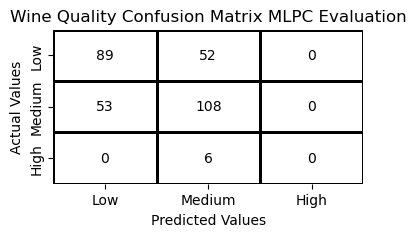

In [1317]:
cm = confusion_matrix(y_test, predsMLPC)
cm_df = pd.DataFrame(cm,
                     index = ["Low","Medium","High"],
                     columns = ["Low","Medium","High"])
plt.figure(figsize=(4,2))

# Create a custom color map where all values are white
cmap = sns.color_palette(["#FFFFFF"])

sns.heatmap(cm_df, annot=True, fmt='d', cmap=cmap, cbar=False, linewidths=.8, linecolor='black', annot_kws={"color": "black"})
plt.title('Wine Quality Confusion Matrix MLPC Evaluation')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# Predicting Quality - Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

# split data into X and Y
X = dfm_clean.drop(['quality_label', 'quality', 'wine_type'], axis=1)
y = dfm_clean['quality']

# split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=12)

In [ ]:
from sklearn.linear_model import LinearRegression

LinearR_model = LinearRegression()

LinearR_model.fit(x_train, y_train)

preds = LinearR_model.predict(x_test)

# when I changed the value of random state it jumped from 55 to 67 accuracy. 
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)
print("MSE:", mse)
print("R2:", r2)


MSE: 0.40259512953619947
R2: 0.365500658421019
